### Description

This project contains following sub-folders and scripts:
- analysis, that contains functions for ANN analysis,
- generated/models, where you should paste your downloaded states of the MLP and CNN networks for specific datasets,
- generated/tsne, where t-sne arrays will be saved
- network/constants.py, where you should specify paths to folders described above,
- network/data_loader.py, which define helper loader methods,
- network/network.py, which defines the simple networks architecture

Paper attached to lab materials is an overview of what we will do in this assignment.

In [1]:
from analysis.network_analysis import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

2024-04-08 08:37:39.826018: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 08:37:39.828982: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 08:37:39.872296: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 08:37:40.599793: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## INTER-LAYER EVOLUTION

The bundled image summarizes a sequence of `N` projections, one per hidden layer, shown as thumbnails. For MLP `N=4`, and for CNN `N=2`, Trail hues encode classes, and edge brightness encodes layer number (depth). Thus, the brightness gradient shows how activation data “flow” through the four network layers. The same idea, but slightly modified, can be employed to visualize "inter-epoch" evolution.

TODO: Use `show_seq_projections` function to calculate points and targets for `N` layers of mnist_mlp model. Use `inter_layer_evolution()` and `show_trace()` for plotting the actual evolution between layers.

IMPORTANT: You need to implement minor detail in `show_seq_projections`

2024-04-08 08:37:42.731738: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-08 08:37:42.756248: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


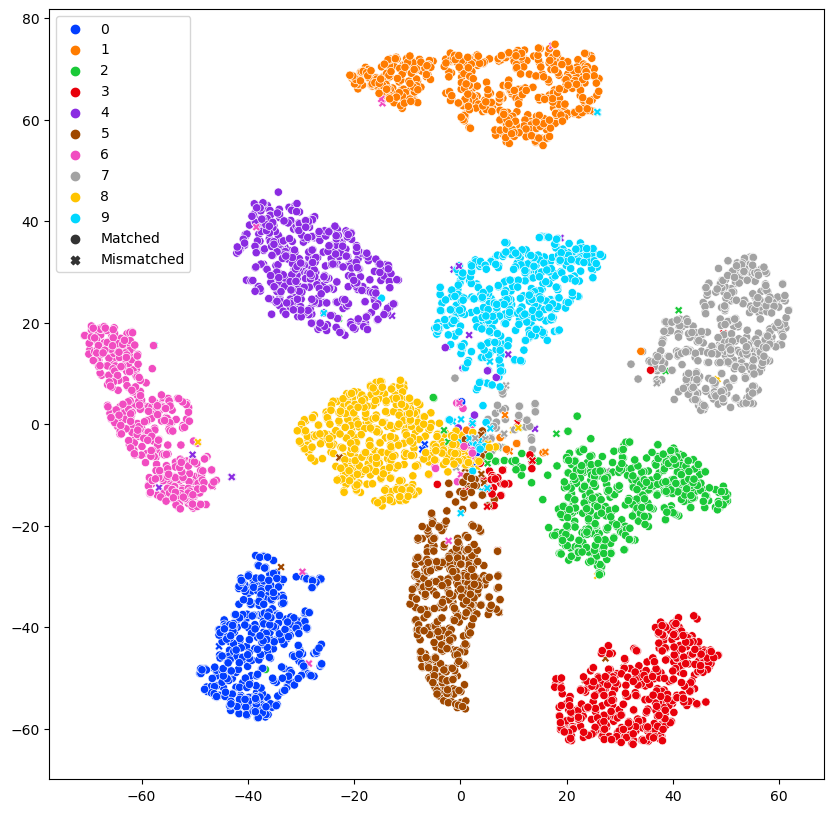

In [2]:
# test out the function
transformed_points, targets = show_seq_projections(DataType.MNIST, "mnist_mlp", 1, 100, 5000)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


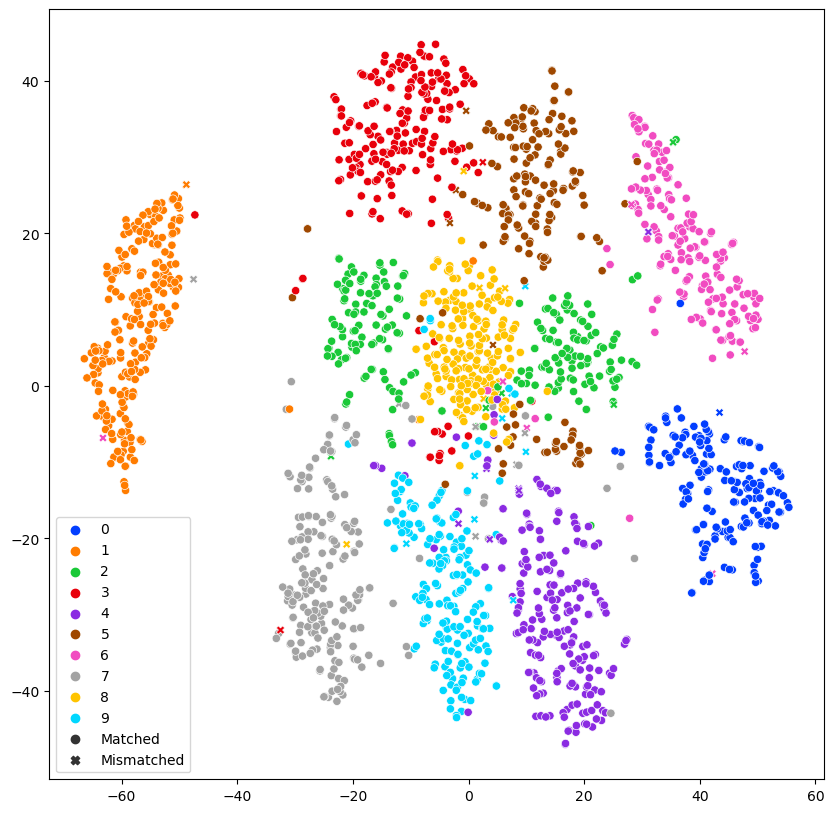

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


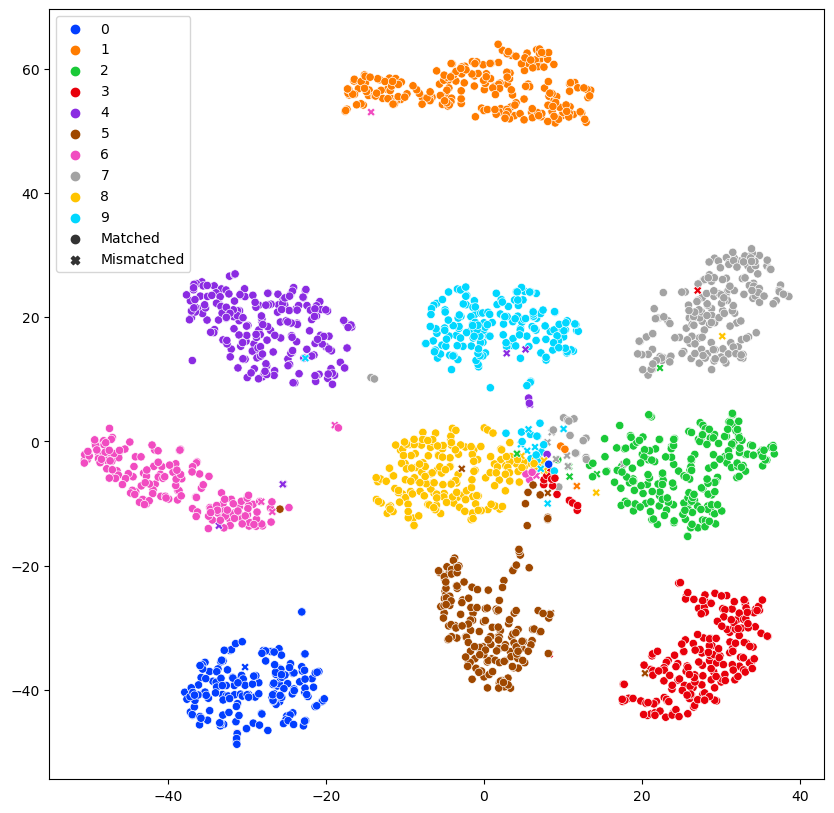

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


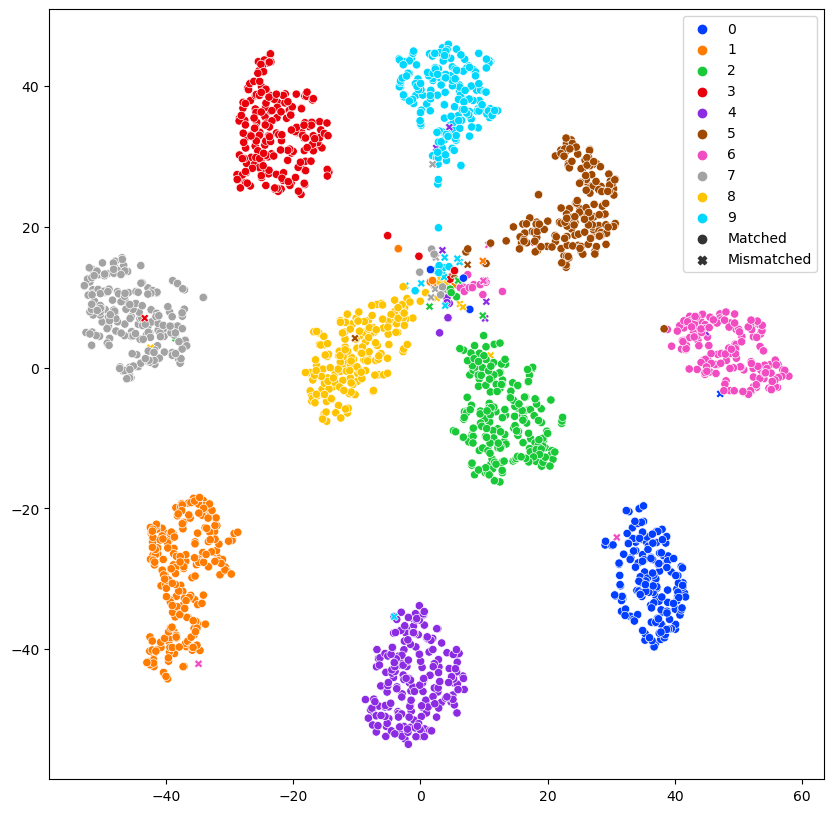

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


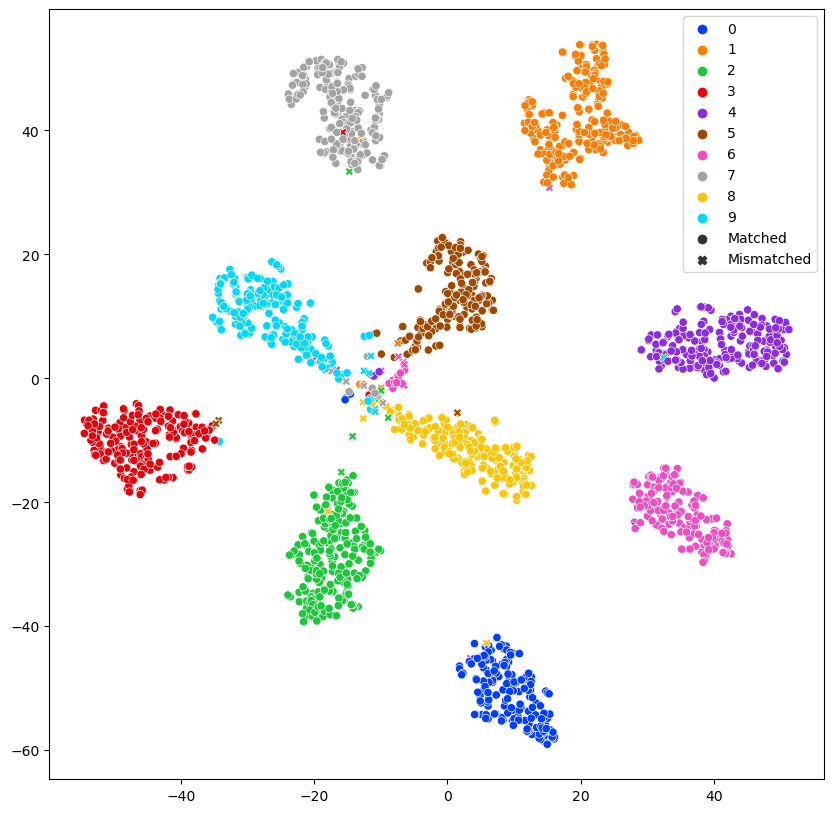

In [6]:
points_by_layers = []
N = 4 # for mlp
for n in range(N):
    transformed_points, targets = show_seq_projections(DataType.MNIST, "mnist_mlp", n, 100, 2000)
    points_by_layers.append(transformed_points)

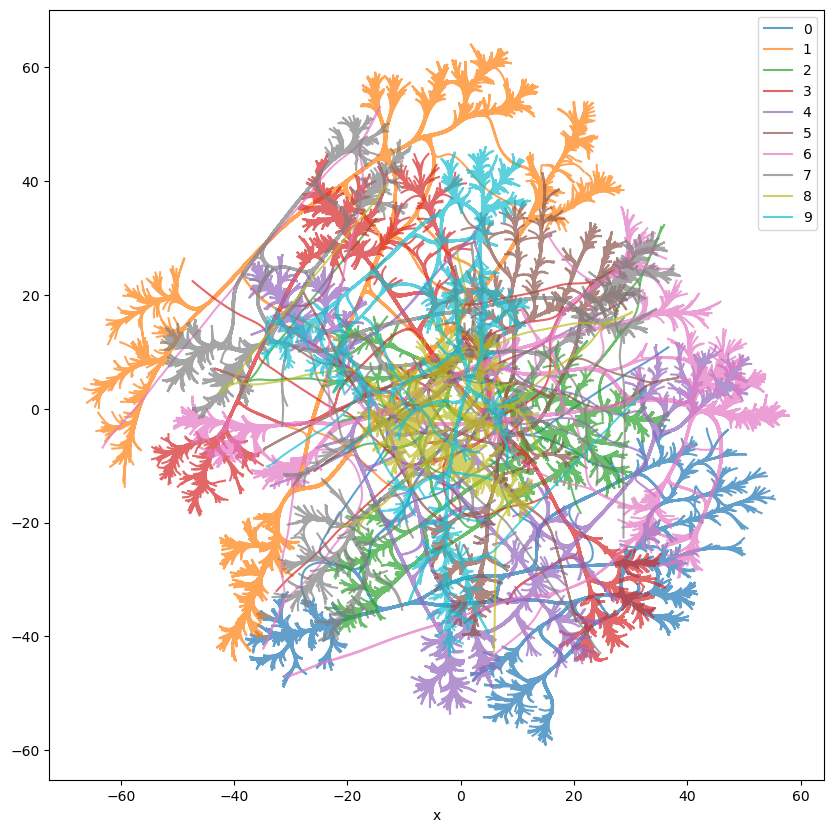

In [7]:
inter_layer_evolution(points_by_layers, targets)

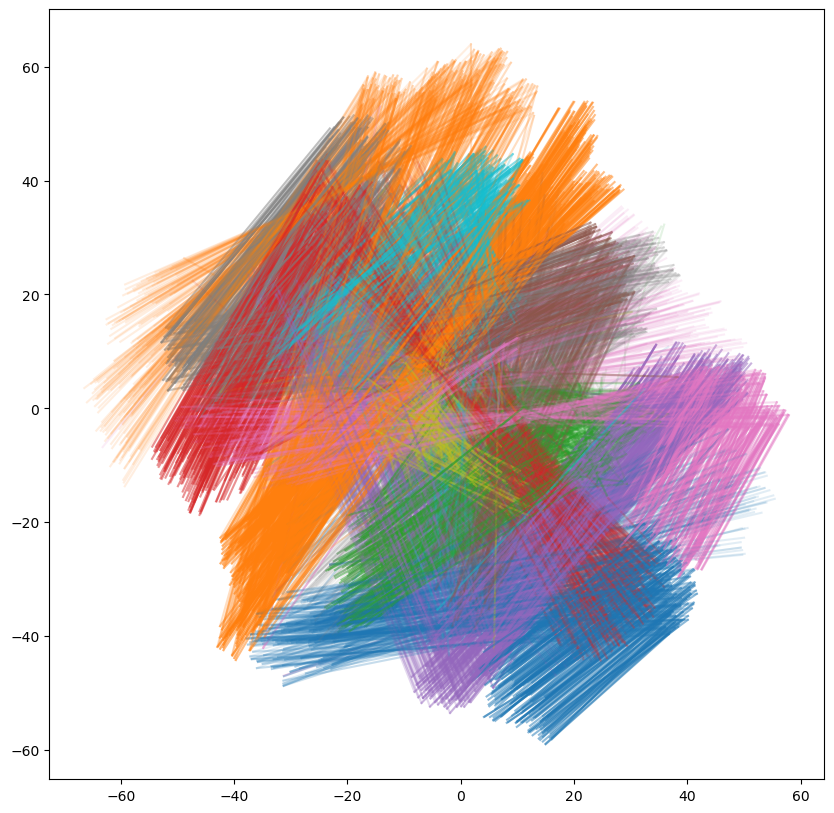

In [8]:
show_trace(points_by_layers, targets)

### COMMENT
Widzimy, że najłatwiej rozdzielalne klasy (0 i 1) praktycznie od pierwszej wartwy są łatwo separowalne od reszty. Dla trudniejszych klas (3, 8, 9) nawet w ostateniej warstwie ich reprezentacje leżą blisko siebie.
Nie jestem pewien co miała pokazać ewolucja między warstwowa. Wizualizujemy tutaj arbitralne 2-wymiarowe reprezentacje aktywacji warstw ukrytych. Ich wzajemne położenie zdaje nie nieść jakiejś znaczącej informacji (której nie niosą scatter ploty samych 2D embeddingów - obrazkina samej górze)

Dodatkowo, dla większej liczby punktów te wizualizaje są zupełnie nieczytelne (dla 5k była to wielka kolorowa plama - w raporcie pozostawiłem wyniki dla 2k)

TODO: Please repeat the previous task for `mnist_cnn` and compare the two. Additionally, using the provided article, try to determine the meaning behind the results.

In [ ]:
#TODO when I get weights

## INTER-EPOCH EVOLUTION
TODO: To complete this task, start by obtaining points and targets after hidden layers using the `get_all_activations` and `process_activations` functions. Then, use analogous functions for generating the inter-epoch evolution plot and trace. Finally, perform this task for both the `mnist_mlp` and `mnist_cnn` networks.


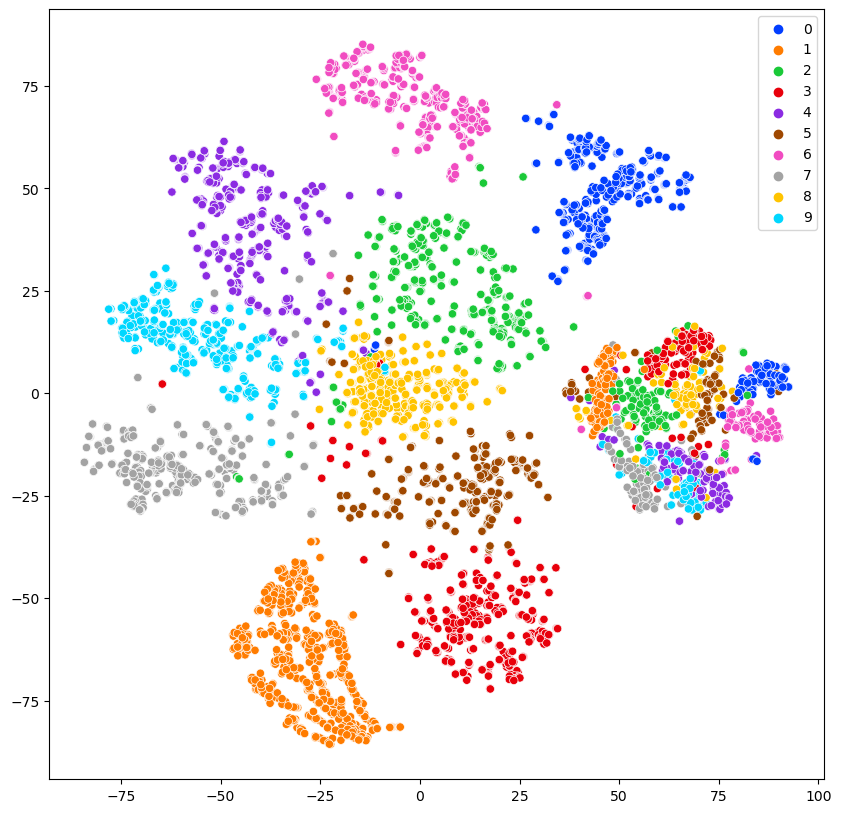

In [11]:
activations, targets = get_all_activations(DataType.MNIST, "mnist_mlp", 1, 1000)

points_lst, targets = process_activations(activations, targets, 1000)

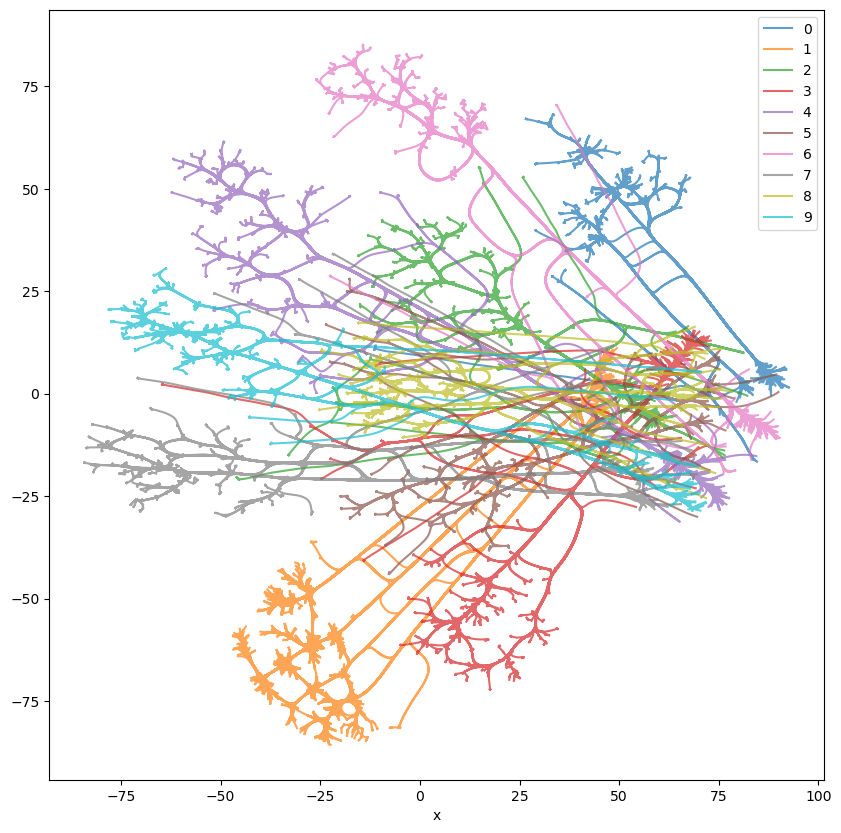

In [12]:
inter_layer_evolution(points_lst, targets)

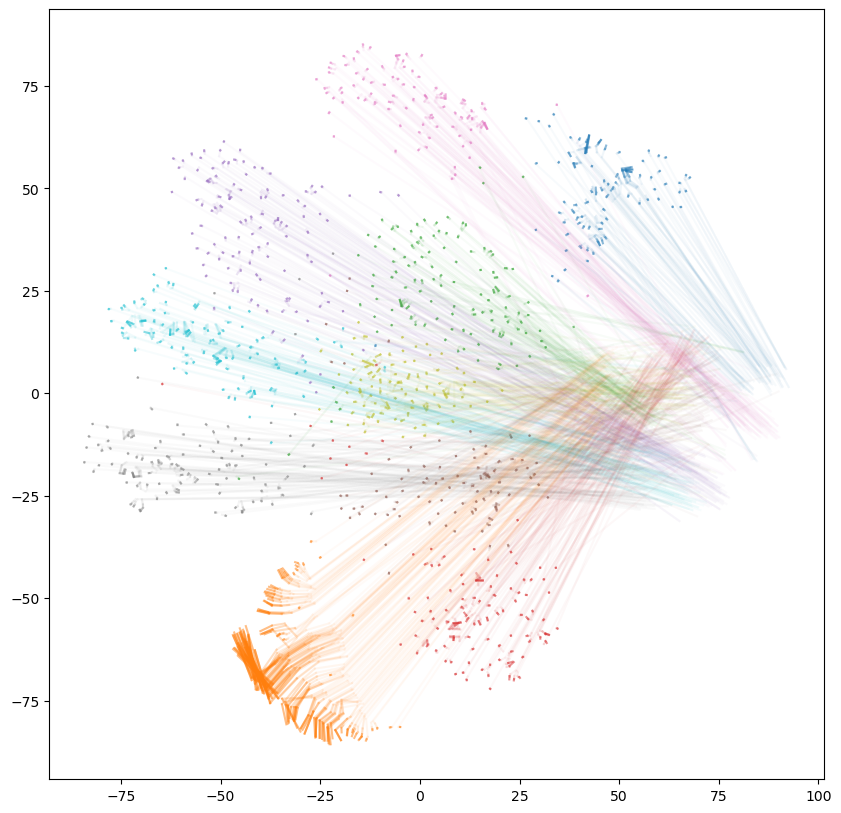

In [13]:
show_trace(points_lst, targets)

### COMMENT
Tutaj mamy dużo ciekawsze wykresy niż w przypadku interlayer evolution. Widzimy jak mzieniają się reprezentacje aktywacji pierwszej warstwy ukrytej wraz z procesem uczenia. Uzykusjemy pożądany efekt, czyli reprezentacje robią się coraz lepiej separowalne.

TODO
Repeat for mnist CNN

## PROJECTION COMPARISION

This exercise shows the neuron projection for the last CNN/MLP hidden layer activations, after training. Ignoring the colors for a moment, we see no clear pattern in the neuron projection, except for some ill-defined visual clusters. We next color each point (neuron) based on its ability to discriminate between specified class (here we define class 0) and all other classes, computed by a standard feature selection technique, based on extremely randomized trees.

TODO: Utilize the `compare_projections` method to generate a projection for both `mnist_mlp` and `mnist_cnn`, focusing on different labels (e.g., 0 and 5). IMPORTANT: Few things in `compare_projections` needs to be implemented.

What observations can be made?

In [44]:
import importlib
import analysis.network_analysis
importlib.reload(analysis.network_analysis)
from analysis.network_analysis import *

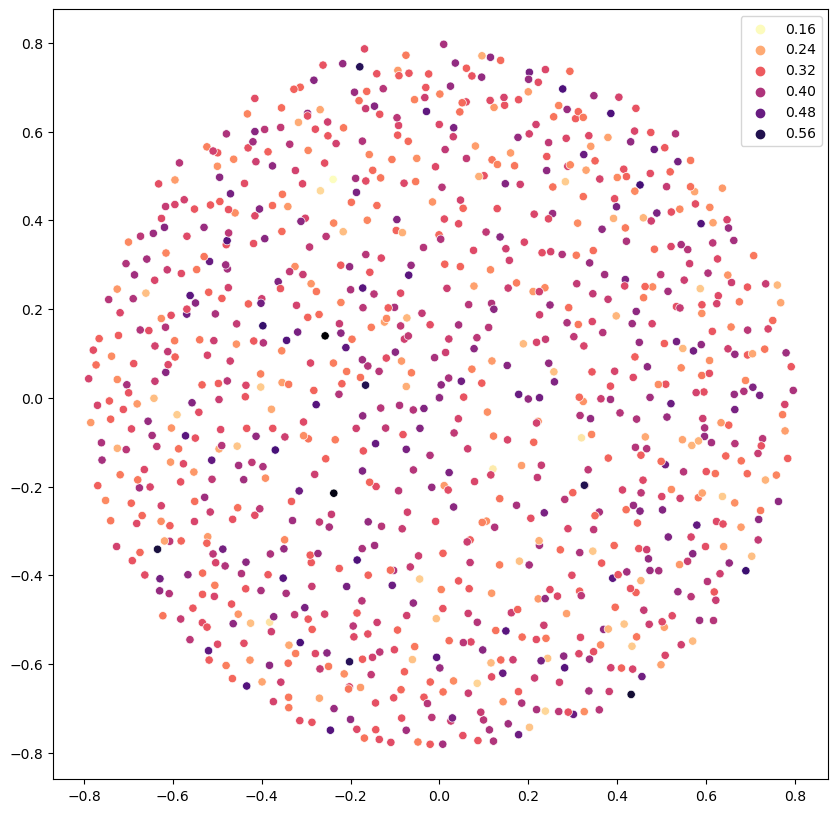

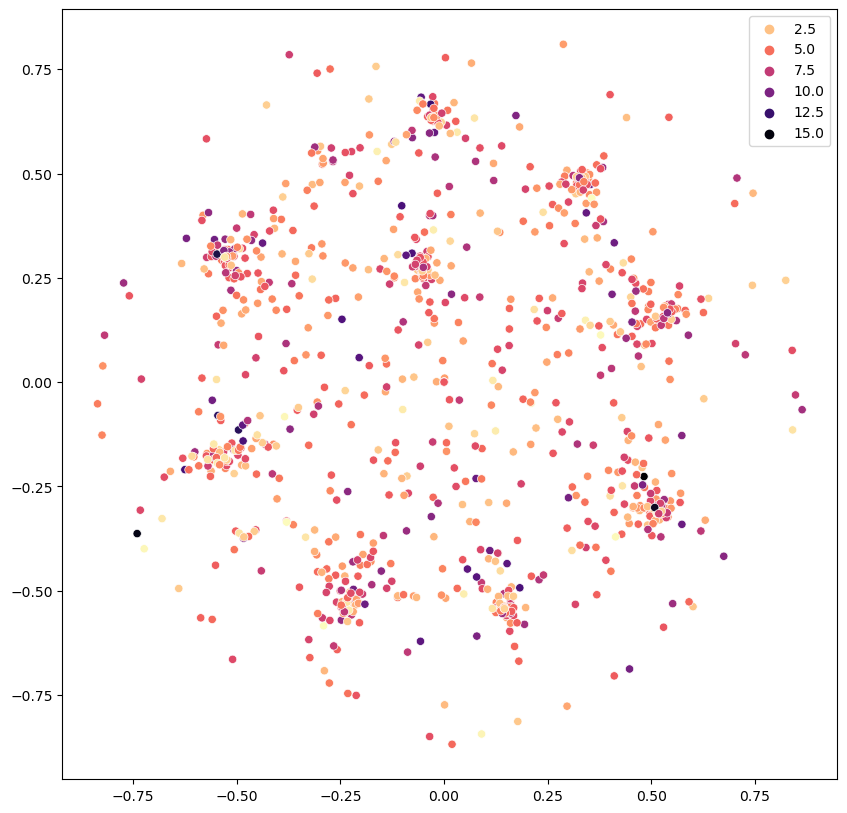

In [45]:
compare_projections(DataType.MNIST, "mnist_mlp", n_layer=4, label=0, size=1000)

### COMMENT

Albo popełniłem gruby błąd, albo dla MLP wcale nie widać rezultatów które przedstawiono w paperze.

TODO - repeat for CNN

## DISCRIMINATIVE NEURON MAP

For discriminative neuron map for the test subsets we use last hidden layer activations, after training. The presence of compact visual clusters shows how the entire set of neurons can be (almost) partitioned into groups with related discriminative roles (specializations),
even though the neuron projection is created without any class information. The activation and neuron projections can be combined to elucidate the role of particular neurons.

TODO: Utilize the `compare_discriminative_map` method to generate a discriminative neuron maps for both `mnist_mlp` and `mnist_cnn`. What observations can be made?

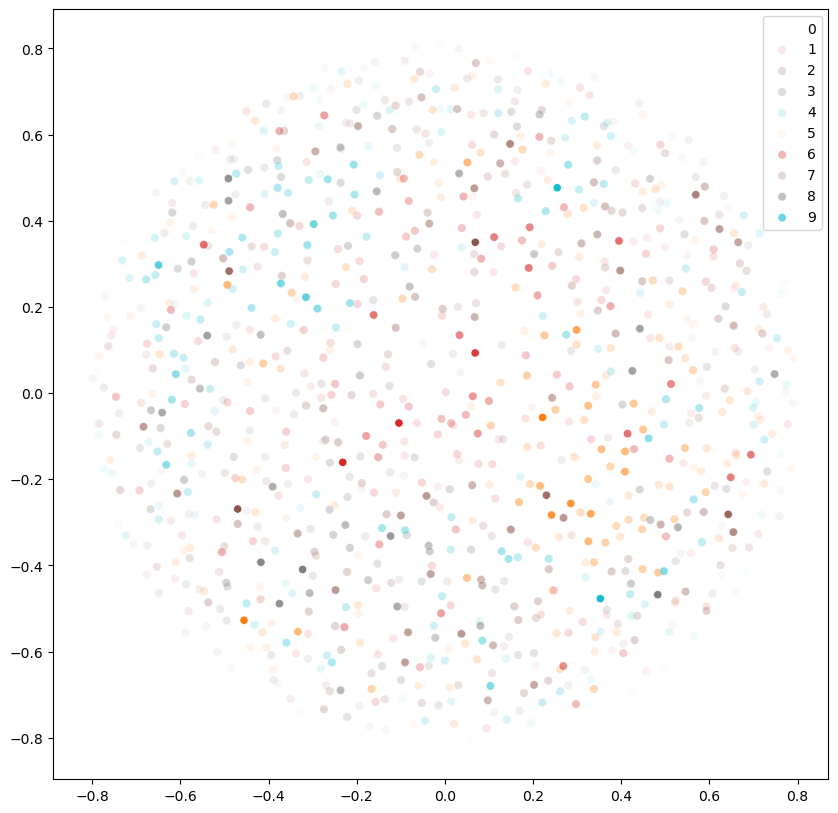

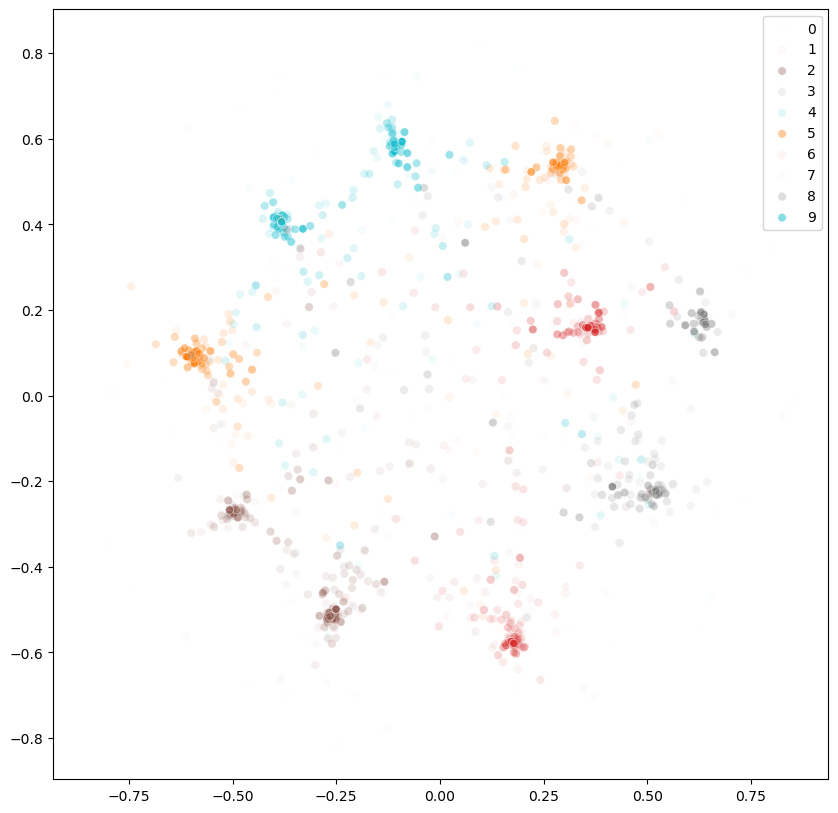

In [46]:
compare_discriminative_map(DataType.MNIST, "mnist_mlp", 4, 2000)

TODO - same for CNN

## Homework
Repeat the analysis for the network parameters of `cifar_mlp` and `cifar_cnn`.